<a href="https://colab.research.google.com/github/Asfia-Fathima/Statistical-Analytics-computing/blob/main/THE_CASE_STUDYYYY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A Case Study
Based on the Employee data
The modules & operations used in this regard are:
1. Data Input Module: Load the dataset from the CSV file.
2. Data Storage Module: Store the dataset in a SQLite database.
3. Data Processing Module: Calculate the mean, min, max, median, std deviation, average salary for each department.
4. Data Cleaning Module: Identify and remove any duplicate records.
5. Reporting Module: Display the employee details with salary greater than 60000.
6. Visualization Module: Plot a histogram of salaries.
7. File Operations Module: Export the dataset to a new CSV file.
8. Data Processing Module: Calculate the average years of experience for each department.
9. Reporting Module: Identify the top 3 highest paid employees.
10. Visualization Module: Plot a bar chart of average salary by department.


In [ ]:
##TO DOWNLOAD THE (EMPLOYEES)CSV FILE IN FOLLOW THIS LINK-https://drive.google.com/uc?export=download&id=17CNWK3vurg6dK7D4Wu3HCpfkMAajkEKD
#PROGRAM:
import sqlite3
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [ ]:
import pandas as pd
import requests
from io import StringIO

file_id = "17CNWK3vurg6dK7D4Wu3HCpfkMAajkEKD"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

response = requests.get(download_url)
data = StringIO(response.text)

df = pd.read_csv(data, on_bad_lines='skip')  # skips malformed lines
print(df.head())



   EMPLOYEE_ID FIRST_NAME  LAST_NAME     EMAIL  PHONE_NUMBER  HIRE_DATE  \
0          198     Donald   OConnell  DOCONNEL  650.507.9833  21-Jun-07   
1          199    Douglas      Grant    DGRANT  650.507.9844  13-Jan-08   
2          200   Jennifer     Whalen   JWHALEN  515.123.4444  17-Sep-03   
3          201    Michael  Hartstein  MHARTSTE  515.123.5555  17-Feb-04   
4          202        Pat        Fay      PFAY  603.123.6666  17-Aug-05   

     JOB_ID MANAGER_ID  DEPARTMENT_ID  SALARY  
0  SH_CLERK        124             50    2600  
1  SH_CLERK        124             50    2600  
2   AD_ASST        101             10    4400  
3    MK_MAN        100             20   13000  
4    MK_REP        201             20    6000  


In [ ]:


#2. Data Storage Module: Store the dataset in a SQLite database.
conn = sqlite3.connect('employee_data.db')
df.to_sql('Employees', conn, if_exists='replace', index=False)
print("DataFrame stored into the SQLite DataBase")



DataFrame stored into the SQLite DataBase


In [ ]:
#3. Data Processing Module: Calculate the mean, min, max, median, std deviation, average salary for each department.
grouped = df.groupby('DEPARTMENT_ID')['SALARY']
#pd.options.display.max_columns = 11
# Create a summary DataFrame
summary_df = pd.DataFrame({
	'Mean': grouped.mean(),
	'Min': grouped.min(),
	'Max': grouped.max(),
	'Median': grouped.median(),
	'Std_Deviation': grouped.std(),
	'Average_Salary': grouped.mean()  # same as Mean
}).reset_index()
summary_df


In [ ]:
#Step 1: Google Drive File ID
file_id = "17CNWK3vurg6dK7D4Wu3HCpfkMAajkEKD"
download_url = f"https://drive.google.com/uc?export=download&id={file_id}"

#Step 2: Request file content
response = requests.get(download_url)
data = StringIO(response.text)

#Step 3: Load CSV, skipping bad lines
df = pd.read_csv(data, on_bad_lines='skip')

#Step 4: Display first 7 rows
print("Original DataFrame:\n", df.head(7))

#Step 5: Remove duplicates
clear_df = df.drop_duplicates()

#Step 6: Display cleaned data
print("DataFrame after dropping duplicates:\n", clear_df.head(7))


Original DataFrame:
    EMPLOYEE_ID FIRST_NAME  LAST_NAME     EMAIL  PHONE_NUMBER  HIRE_DATE  \
0          198     Donald   OConnell  DOCONNEL  650.507.9833  21-Jun-07   
1          199    Douglas      Grant    DGRANT  650.507.9844  13-Jan-08   
2          200   Jennifer     Whalen   JWHALEN  515.123.4444  17-Sep-03   
3          201    Michael  Hartstein  MHARTSTE  515.123.5555  17-Feb-04   
4          202        Pat        Fay      PFAY  603.123.6666  17-Aug-05   
5          203      Susan     Mavris   SMAVRIS  515.123.7777  07-Jun-02   
6          204    Hermann       Baer     HBAER  515.123.8888  07-Jun-02   

     JOB_ID MANAGER_ID  DEPARTMENT_ID  SALARY  
0  SH_CLERK        124             50    2600  
1  SH_CLERK        124             50    2600  
2   AD_ASST        101             10    4400  
3    MK_MAN        100             20   13000  
4    MK_REP        201             20    6000  
5    HR_REP        101             40    6500  
6    PR_REP        101             70   10

In [ ]:

# 5. Reporting Module: Display the employee details with salary greater than 60000.
high_salary = df[df['SALARY']>6000]
print("Employee details where salary is greater than 6000:\n",high_salary.head(7))



Employee details where salary is greater than 6000:
     EMPLOYEE_ID FIRST_NAME  LAST_NAME     EMAIL  PHONE_NUMBER  HIRE_DATE  \
3           201    Michael  Hartstein  MHARTSTE  515.123.5555  17-Feb-04   
5           203      Susan     Mavris   SMAVRIS  515.123.7777  07-Jun-02   
6           204    Hermann       Baer     HBAER  515.123.8888  07-Jun-02   
7           205    Shelley    Higgins  SHIGGINS  515.123.8080  07-Jun-02   
8           206    William      Gietz    WGIETZ  515.123.8181  07-Jun-02   
9           100     Steven       King     SKING  515.123.4567  17-Jun-03   
10          101      Neena    Kochhar  NKOCHHAR  515.123.4568  21-Sep-05   

        JOB_ID MANAGER_ID  DEPARTMENT_ID  SALARY  
3       MK_MAN        100             20   13000  
5       HR_REP        101             40    6500  
6       PR_REP        101             70   10000  
7       AC_MGR        101            110   12008  
8   AC_ACCOUNT        205            110    8300  
9      AD_PRES         -        

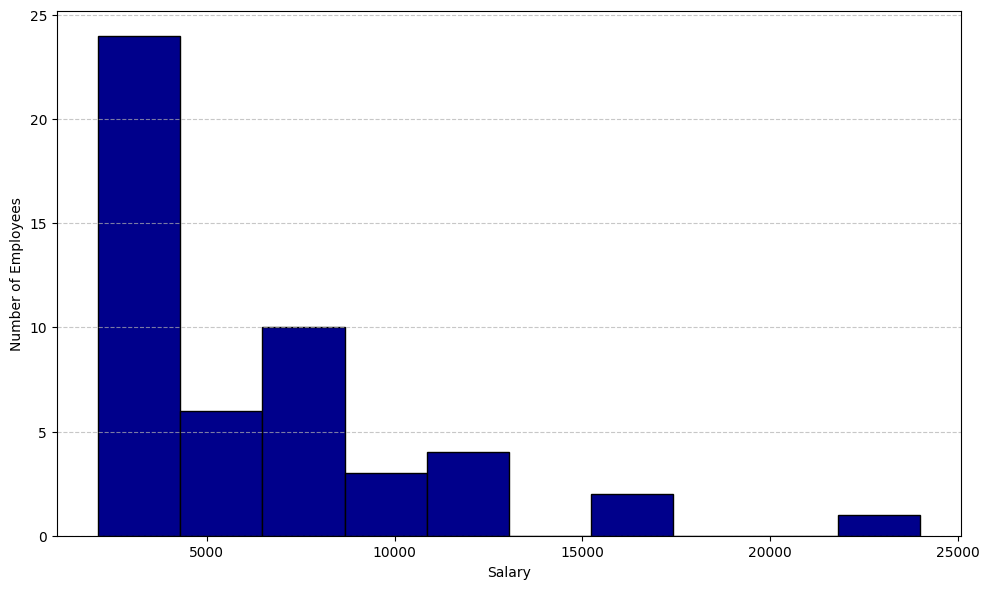

In [ ]:
#6. Visualization Module: Plot a histogram of salaries.
plt.figure(figsize=(10,6))
plt.hist(df['SALARY'], bins=10, color='darkblue',edgecolor='black')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.grid(axis='y',linestyle='--',alpha=0.7)
plt.tight_layout()
plt.show()


In [ ]:
#7  File Operations Module: Export the dataset to a new CSV file.


#Create a DataFrame from the employee table
df = pd.DataFrame({ 'FIRST_NAME': ['Donald', 'Douglas', 'Jennifer', 'Michael', 'Pat', 'Susan', 'Hermann', 'Shelley', 'William', 'Steven'],
'LAST_NAME': ['OConnell', 'Grant', 'Whalen', 'Hartstein', 'Fay', 'Mavris', 'Baer', 'Higgins', 'Gietz', 'King'],
'EMAIL': ['DOCONNELL', 'DGRANT', 'JWHALEN', 'MHARTSTE', 'PFAY', 'SMAVRIS', 'HBAER', 'SHIGGINS', 'WGIETZ', 'SKING'],
 'PHONE_NUMBER': ['650.507.9833', '650.507.9844', '515.123.4444', '515.123.5555', '603.123.6666', '515.123.7777', '515.123.8888', '515.123.8080', '515.123.8181', '515.123.4567']
 })
print(df)
df.to_csv('employee_data.csv',index=False)


  FIRST_NAME  LAST_NAME      EMAIL  PHONE_NUMBER
0     Donald   OConnell  DOCONNELL  650.507.9833
1    Douglas      Grant     DGRANT  650.507.9844
2   Jennifer     Whalen    JWHALEN  515.123.4444
3    Michael  Hartstein   MHARTSTE  515.123.5555
4        Pat        Fay       PFAY  603.123.6666
5      Susan     Mavris    SMAVRIS  515.123.7777
6    Hermann       Baer      HBAER  515.123.8888
7    Shelley    Higgins   SHIGGINS  515.123.8080
8    William      Gietz     WGIETZ  515.123.8181
9     Steven       King      SKING  515.123.4567


In [ ]:
#8 Data Processing Module: Calculate the average years of experience for each department.
import pandas as pd
#Given department IDs
department_ids = [50, 50, 10, 20, 20, 40, 70, 110, 110, 90, 90, 90, 60, 60, 60, 60, 60, 100, 100, 100, 100, 100, 100, 30, 30, 30, 30, 30, 30, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50, 50]
#Let's assume the years of experience are the same as the index for simplicity
years_of_experience = list(range(1, len(department_ids) + 1))
#Create a DataFrame
df = pd.DataFrame({ 'Department ID': department_ids, 'Years of Experience': years_of_experience })
#Group the data by Department ID and calculate the average years of experience
average_experience = df.groupby('Department ID')['Years of Experience'].mean()
print(average_experience)


Department ID
10      3.000000
20      4.500000
30     26.500000
40      6.000000
50     36.652174
60     15.000000
70      7.000000
90     11.000000
100    20.500000
110     8.500000
Name: Years of Experience, dtype: float64


In [ ]:
#9. Reporting Module: Identify the top 3 highest paid employees.
df["FULL_NAME"] = df["FIRST_NAME"] + " " + df["LAST_NAME"]
df["SALARY"] = pd.to_numeric(df["SALARY"], errors="coerce")
df = df.dropna(subset=["SALARY"])
top_3 = df.sort_values(by="SALARY", ascending=False).head(3)
print("\nTop 3 Highest Paid Employees:")
print(top_3[["FULL_NAME", "SALARY"]])



Top 3 Highest Paid Employees:
        FULL_NAME  SALARY
9     Steven King   24000
10  Neena Kochhar   17000
11    Lex De Haan   17000


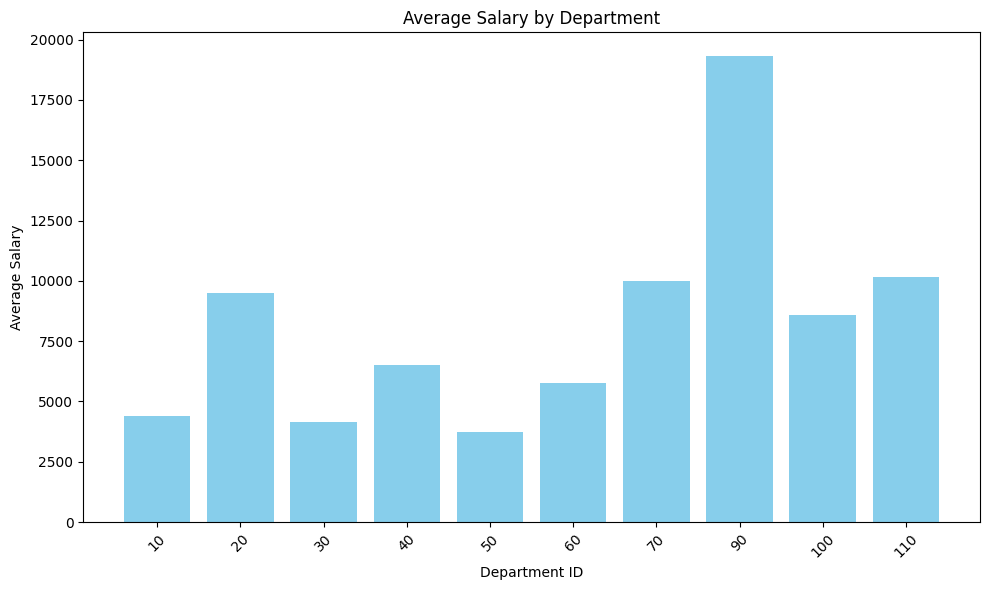

In [ ]:

#10. Visualization Module: Plot a bar chart of average salary by department.
avg_salary = df.groupby("DEPARTMENT_ID")["SALARY"].mean()
plt.figure(figsize=(10, 6))
plt.bar(avg_salary.index.astype(str), avg_salary.values, color="skyblue")
plt.xlabel("Department ID")
plt.ylabel("Average Salary")
plt.title("Average Salary by Department")
plt.xticks(rotation=45)
plt.tight_layout()
